## Import Required Libraries

In [1]:
import pandas as pd
# import us
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read Datasets

In [2]:
# Load the data from CSV files with header in the first row
homes_df = pd.read_csv("data/homes.csv", header=0)
homes_df.head()

,RegionID,SizeRank,Location,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,394913,1,"New York, NY",181391.9783,182163.9208,182941.8163,184517.2890,186145.6237,187950.1613,189921.5392,...,561266.5188,567909.3853,574055.6109,578134.7169,579224.7183,577396.7827,575299.5895,573540.8633,571164.0735,571129.8381
1,753899,2,"Los Angeles, CA",216288.4908,217088.5199,218157.4498,220302.7794,222656.3729,224999.3133,227389.7577,...,866791.4952,877943.1300,884285.4051,885962.6057,882724.2034,876940.8341,871737.3300,868143.7143,863937.5709,855850.8571
2,394463,3,"Chicago, IL",140446.9430,140580.1069,140830.7033,141455.0836,142204.8211,143045.1587,143936.1630,...,285882.2169,288752.3799,290693.5349,291105.6857,290463.0955,288855.9709,287575.7532,286890.1417,286224.0249,286791.7425
3,394514,4,"Dallas, TX",125298.5074,125361.2079,125432.0650,125609.3263,125835.7850,126061.3904,126297.5666,...,357099.5721,363814.4164,369218.7401,371931.5195,371959.0543,370048.7040,368024.0027,366169.9550,363708.3334,361199.2355
4,394692,5,"Houston, TX",115156.3164,115174.6768,115091.9295,115135.8005,115177.5944,115354.6637,115528.5906,...,288093.0582,292671.5442,296675.2335,299371.3230,300457.1817,300223.0117,299624.7613,298972.1881,297636.1824,296082.5717


In [3]:
rentals_df = pd.read_csv("data/rentals.csv", header=0)
rentals_df.head()

,RegionID,SizeRank,Location,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,394913,1,"New York, NY",2385.219396,2403.753582,2421.231076,2439.382330,2448.425349,2462.016357,2468.739863,...,2955.859223,3015.296055,3076.799046,3130.332141,3154.033247,3151.025599,3127.883766,3095.742311,3072.639223,3065.017318
1,753899,2,"Los Angeles, CA",1914.730864,1927.655457,1940.995475,1952.425792,1968.438708,1982.282355,1993.858844,...,2823.035882,2857.376769,2882.139364,2903.194297,2916.149142,2923.484011,2919.007841,2910.841929,2902.889391,2896.943067
2,394463,3,"Chicago, IL",1422.672410,1435.441402,1446.702786,1470.374315,1476.787061,1483.009421,1481.020743,...,1795.344311,1820.754624,1841.547087,1860.531252,1868.719705,1871.457472,1869.964119,1863.995689,1864.939703,1868.858460
3,394514,4,"Dallas, TX",1157.334850,1167.824303,1179.831226,1187.613051,1193.868953,1198.609530,1201.245156,...,1740.651141,1769.936539,1803.818103,1827.997976,1837.990096,1837.313291,1825.096163,1810.306142,1795.009792,1789.450877
4,394692,5,"Houston, TX",1308.796225,1316.986178,1326.252241,1335.459857,1340.496956,1344.864896,1343.707876,...,1639.938463,1655.470752,1670.135046,1682.955319,1690.332147,1689.515448,1684.223354,1675.593091,1669.897868,1674.996101


## Data Preprocessing

#### Perform any necessary data cleaning and transformations to prepare the datasets for analysis.


#### Pivot the date columns to a new single column for date. Convert this date to the year.

In [4]:
# Melt the date columns in the homes dataset
melted_homes = homes_df.melt(id_vars=['RegionID', 'SizeRank', 'Location'],
                             var_name='Date',
                             value_name='HomePrice')

# Melt the date columns in the rentals dataset
melted_rentals = rentals_df.melt(id_vars=['RegionID', 'SizeRank', 'Location'],
                                 var_name='Date',
                                 value_name='RentalPrice')

In [5]:
#convert the date into datetime
melted_homes['Date'] = pd.to_datetime(melted_homes['Date'])
melted_rentals['Date'] = pd.to_datetime(melted_rentals['Date'])

#### Merge the datasets based on relevant columns to create a consolidated dataset for analysis.

In [6]:
merged_df = pd.merge(melted_homes, melted_rentals, on=['RegionID', 'SizeRank', 'Location', 'Date'])
merged_df

,RegionID,SizeRank,Location,Date,HomePrice,RentalPrice
0,394913,1,"New York, NY",2015-03-31,348629.7250,2385.219396
1,753899,2,"Los Angeles, CA",2015-03-31,501808.0759,1914.730864
2,394463,3,"Chicago, IL",2015-03-31,184034.2766,1422.672410
3,394514,4,"Dallas, TX",2015-03-31,176313.3574,1157.334850
4,394692,5,"Houston, TX",2015-03-31,171025.8352,1308.796225
...,...,...,...,...,...,...
50535,395004,853,"Prineville, OR",2023-01-31,411448.5173,1600.000000
50536,753884,859,"Hailey, ID",2023-01-31,811777.1684,2375.000000
50537,394718,892,"Jamestown, ND",2023-01-31,185189.4713,689.333333
50538,394996,907,"Portales, NM",2023-01-31,122624.8499,930.000000


In [7]:
# Create a new 'Year' column from the 'Date' column
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

In [8]:
#check if there are null values
merged_df.isna().sum()

RegionID           0
SizeRank           0
Location           0
Date               0
HomePrice        156
RentalPrice    21288
Year               0
dtype: int64

#### Now at this point there are two ways to handle these missing values
* Drop the null values but in this way we'll loose approximately 35% of the total data
* Second is the fill the null values with the average prices but in this way we can risk the true variability of the data

In [9]:
merged_df = merged_df.dropna()

In [10]:
#fill the null values with average prices 
# merged_df.fillna(merged_df.mean())

In [11]:
#create city and state column
merged_df[['city', 'state']] = merged_df['Location'].str.split(',', expand=True)

In [12]:
merged_df

,RegionID,SizeRank,Location,Date,HomePrice,RentalPrice,Year,city,state
0,394913,1,"New York, NY",2015-03-31,348629.7250,2385.219396,2015,New York,NY
1,753899,2,"Los Angeles, CA",2015-03-31,501808.0759,1914.730864,2015,Los Angeles,CA
2,394463,3,"Chicago, IL",2015-03-31,184034.2766,1422.672410,2015,Chicago,IL
3,394514,4,"Dallas, TX",2015-03-31,176313.3574,1157.334850,2015,Dallas,TX
4,394692,5,"Houston, TX",2015-03-31,171025.8352,1308.796225,2015,Houston,TX
...,...,...,...,...,...,...,...,...,...
50535,395004,853,"Prineville, OR",2023-01-31,411448.5173,1600.000000,2023,Prineville,OR
50536,753884,859,"Hailey, ID",2023-01-31,811777.1684,2375.000000,2023,Hailey,ID
50537,394718,892,"Jamestown, ND",2023-01-31,185189.4713,689.333333,2023,Jamestown,ND
50538,394996,907,"Portales, NM",2023-01-31,122624.8499,930.000000,2023,Portales,NM


## Data Analysis:

### Calculate meaningful metrics or statistics to gain insights into the real estate market, such as average home prices, rental trends, or any other relevant factors.

**Average Home Prices by Year:**

In [13]:
average_home_prices = merged_df.groupby('Year')['HomePrice'].mean()
average_home_prices.reset_index()

,Year,HomePrice
0,2015,194076.489072
1,2016,202576.588259
2,2017,209624.752642
3,2018,221581.118263
4,2019,231757.451989
5,2020,246192.834691
6,2021,281713.803106
7,2022,309795.881025
8,2023,295717.586822


 **Average Rental Prices by Year:**


In [14]:
average_rental_prices = merged_df.groupby('Year')['RentalPrice'].mean().reset_index()
average_rental_prices

,Year,RentalPrice
0,2015,1077.672058
1,2016,1131.551025
2,2017,1160.745971
3,2018,1200.146708
4,2019,1247.869215
5,2020,1290.616823
6,2021,1411.154924
7,2022,1524.466085
8,2023,1500.258758


#### Total Number of Regions:


In [15]:
total_regions = merged_df['RegionID'].nunique()
total_regions

532

#### Region with the Highest Home Price:

In [16]:
region_highest_home_price = merged_df.loc[merged_df['HomePrice'].idxmax(), 'Location']
highest_home_price = merged_df['HomePrice'].max()
print(f'{region_highest_home_price} is the region having highest price: {highest_home_price}')

San Jose, CA is the region having highest price: 1473831.987


#### Region with the Highest Rental Price:


In [17]:
region_highest_rental_price = merged_df.loc[merged_df['RentalPrice'].idxmax(), 'Location']
highest_rental_price = merged_df['RentalPrice'].max()
print(f'{region_highest_rental_price} is the region having highest price: {highest_rental_price}')

Glenwood Springs, CO is the region having highest price: 28465.27778


#### Correlation between Home Prices and Rental Prices:


In [18]:
correlation = merged_df['HomePrice'].corr(merged_df['RentalPrice'])
correlation

0.5093751561476981

There is a medium positive correlation between home price and rental price

### Conduct exploratory data analysis to identify patterns, trends, or correlations in the data.

#### Pattern in Prices Over Time


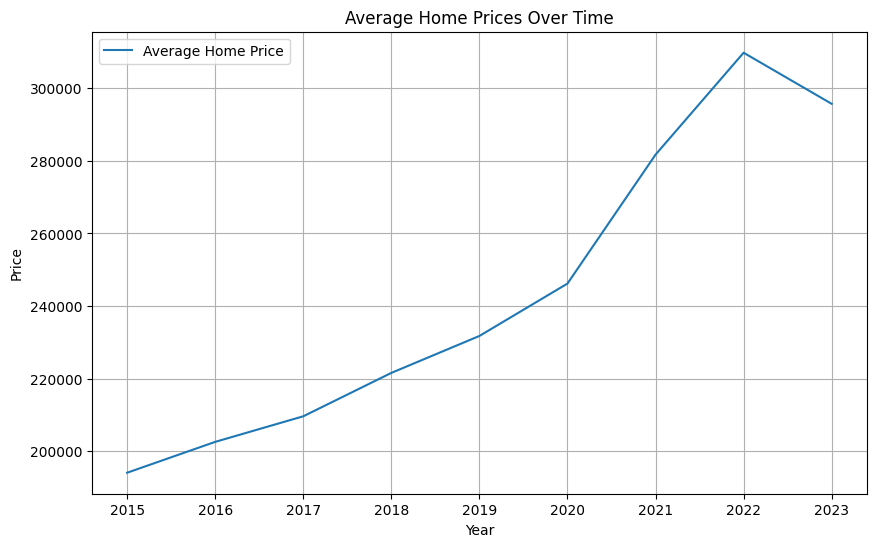

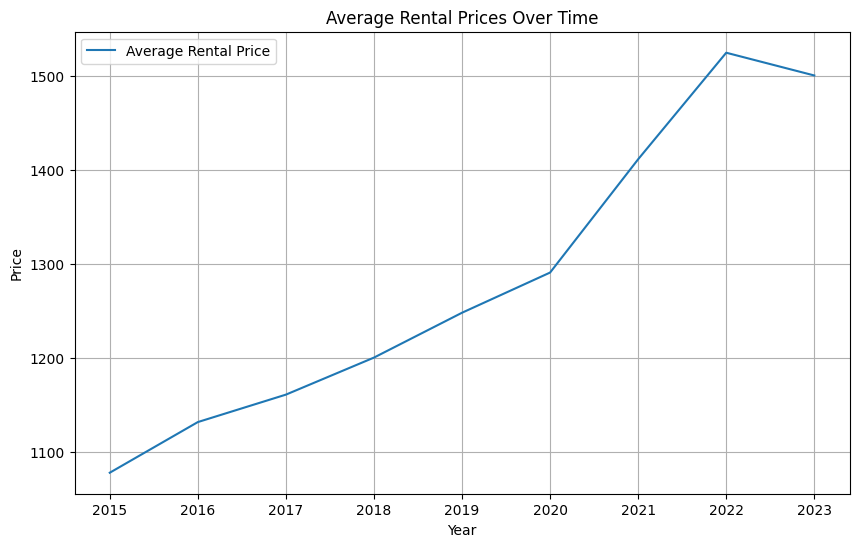

In [19]:
# Calculate average prices by year
average_home_prices = merged_df.groupby('Year')['HomePrice'].mean()
average_rental_prices = merged_df.groupby('Year')['RentalPrice'].mean()

# Plot average home prices and rental prices over time
plt.figure(figsize=(10, 6))
plt.plot(average_home_prices.index, average_home_prices, label='Average Home Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average Home Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(average_rental_prices.index, average_rental_prices, label='Average Rental Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average Rental Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


#### Observation:
* Home Prices and Rental prices are following exactly same pattern over the years
* Except the differnce in prices.
* So the above graphs also justifies the correlation as well.
* The prices increased over the years of both house and rental.
* There is a major price bump after 2020

#### Heatmap of Correlation:

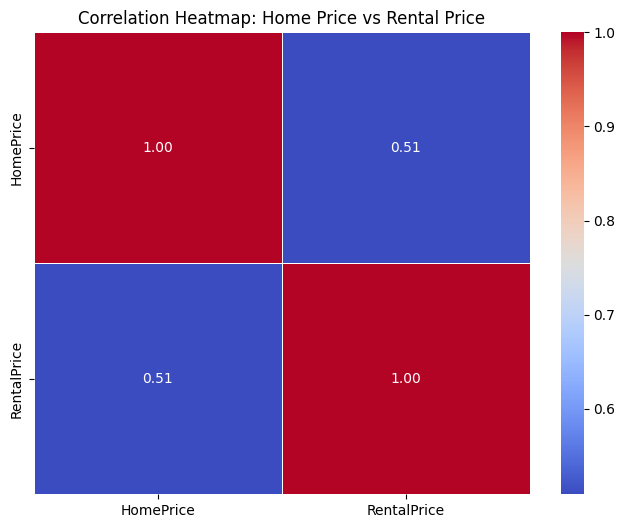

In [20]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = merged_df[['HomePrice', 'RentalPrice']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Home Price vs Rental Price')
plt.show()

### Top 10 States

#### Top 10 States having highest house prices

In [21]:
plt.style.use('ggplot')

In [22]:
merged_df.groupby(['state'])['HomePrice'].mean().sort_values(ascending = False).head(10)

state
 HI    681319.741890
 CA    505024.016392
 DC    425247.266504
 CO    392531.597835
 WA    364502.559410
 UT    361209.643204
 OR    346474.340770
 MA    343042.006092
 NV    342826.558069
 MT    321390.893279
Name: HomePrice, dtype: float64

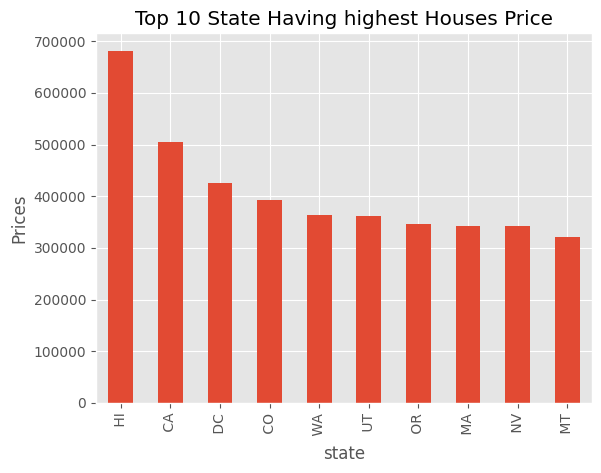

In [23]:
merged_df.groupby(['state'])['HomePrice'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 State Having highest Houses Price')
plt.ylabel('Prices')
plt.show()

#### Top 10 States Having highest Rental Prices


In [24]:
merged_df.groupby(['state'])['RentalPrice'].mean().sort_values(ascending = False).head(10)

state
 CO    3020.032347
 HI    2470.361381
 CA    1927.959941
 DC    1919.250866
 MA    1707.543686
 NJ    1656.291590
 VT    1547.377930
 FL    1472.688869
 CT    1459.130982
 NV    1459.015891
Name: RentalPrice, dtype: float64

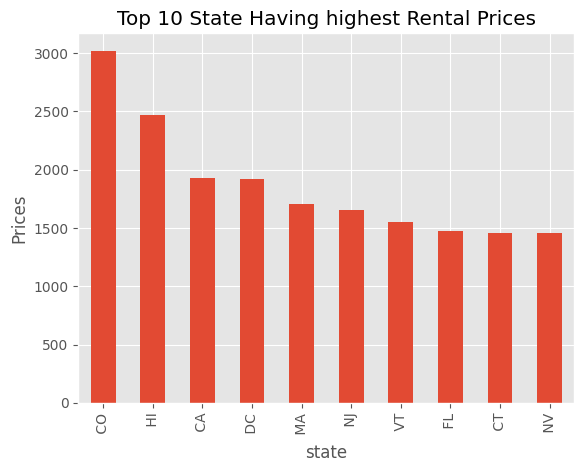

In [25]:
merged_df.groupby(['state'])['RentalPrice'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 State Having highest Rental Prices')
plt.ylabel('Prices')
plt.show()

#### Top 10 States Having Lowest Rental Prices

In [26]:
merged_df.groupby(['state'])['RentalPrice'].mean().sort_values(ascending = False).tail(10)

state
 WI    977.006521
 NE    969.271013
 OK    962.097232
 OH    944.678774
 IL    939.056140
 MO    928.519449
 IN    916.997832
 IA    912.789629
 KS    897.530596
 WV    849.504786
Name: RentalPrice, dtype: float64

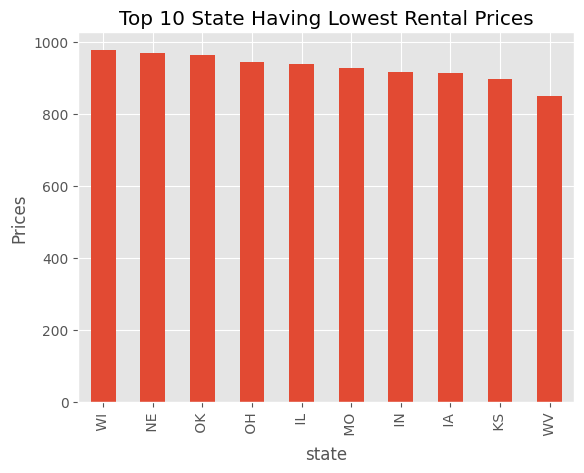

In [27]:
merged_df.groupby(['state'])['RentalPrice'].mean().sort_values(ascending = False).tail(10).plot(kind = 'bar')
plt.title('Top 10 State Having Lowest Rental Prices')
plt.ylabel('Prices')
plt.show()

#### Top 10 state havig lowest House Prices

In [28]:
merged_df.groupby(['state'])['HomePrice'].mean().sort_values(ascending = False).tail(10)

state
 LA    169779.827558
 GA    168176.359318
 IN    153072.020102
 KS    152644.073276
 MS    152333.691063
 AR    152228.015975
 OH    151111.606675
 IL    143799.843330
 OK    137683.259694
 WV    126701.130824
Name: HomePrice, dtype: float64

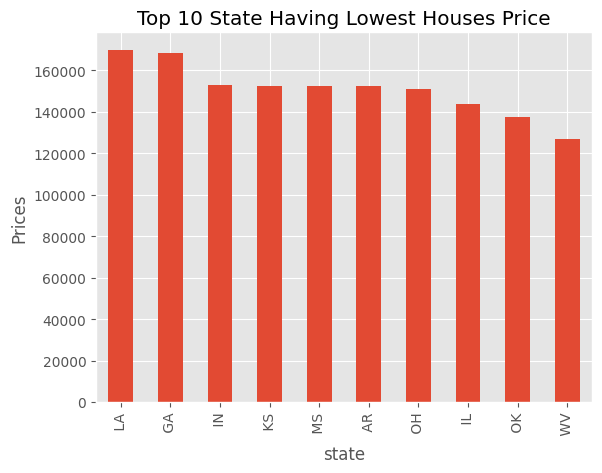

In [29]:
merged_df.groupby(['state'])['HomePrice'].mean().sort_values(ascending = False).tail(10).plot(kind = 'bar')
plt.title('Top 10 State Having Lowest Houses Price')
plt.ylabel('Prices')
plt.show()

### Top 10 Cities

#### Top 10 Cities having highest house prices

In [30]:
merged_df.groupby(['city'])['HomePrice'].mean().sort_values(ascending = False).head(10)

city
San Jose           1.058198e+06
Breckenridge       9.338299e+05
San Francisco      8.885943e+05
Kahului            8.690675e+05
Hailey             8.117772e+05
Santa Cruz         8.045241e+05
Napa               6.717408e+05
Urban Honolulu     6.698227e+05
Los Angeles        6.445692e+05
Barnstable Town    6.339493e+05
Name: HomePrice, dtype: float64

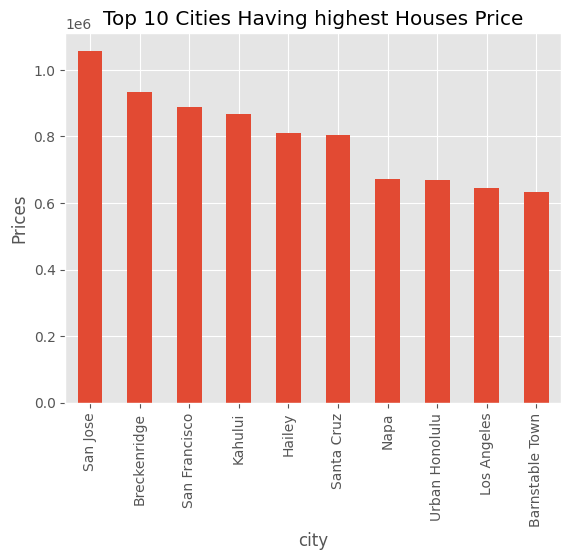

In [31]:
merged_df.groupby(['city'])['HomePrice'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Cities Having highest Houses Price')
plt.ylabel('Prices')
plt.show()

#### Top 10 Cities Having highest Rental Prices

In [32]:
merged_df.groupby(['city'])['RentalPrice'].mean().sort_values(ascending = False).head(10)

city
Glenwood Springs    16499.943200
Breckenridge         4000.000000
Kahului              3093.830186
Key West             3011.269923
San Jose             2866.870374
San Francisco        2783.934678
New York             2617.719111
Santa Cruz           2608.037786
Hilo                 2605.971544
Boston               2503.632994
Name: RentalPrice, dtype: float64

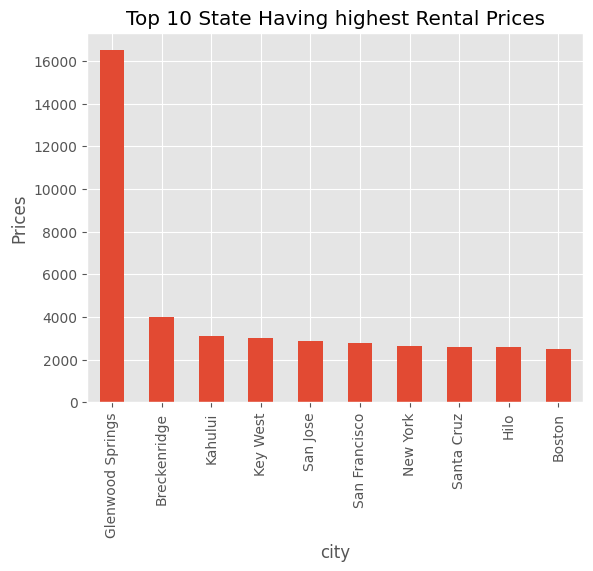

In [33]:
merged_df.groupby(['city'])['RentalPrice'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 State Having highest Rental Prices')
plt.ylabel('Prices')
plt.show()

#### Top 10 Cities having lowest house prices

In [34]:
merged_df.groupby(['city'])['HomePrice'].mean().sort_values(ascending = False).tail(10)

city
Carbondale    99712.424142
Great Bend    98167.913360
Youngstown    97959.806242
Hutchinson    97847.601939
Ponca City    97201.255100
Lawton        96651.844981
Muncie        96233.958586
Pine Bluff    87742.592395
Johnstown     77148.718504
Danville      70675.446617
Name: HomePrice, dtype: float64

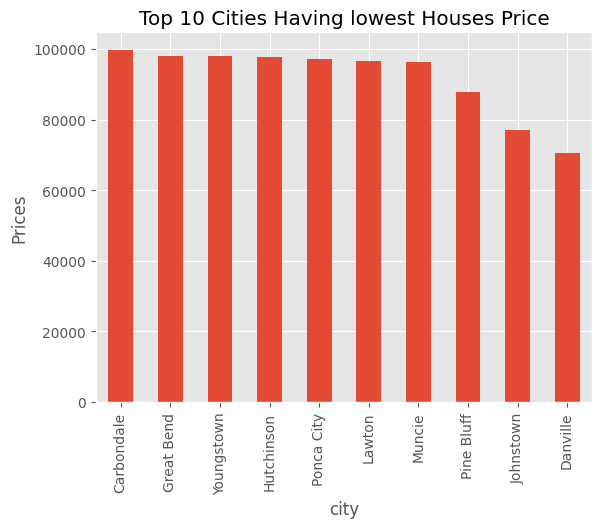

In [35]:
merged_df.groupby(['city'])['HomePrice'].mean().sort_values(ascending = False).tail(10).plot(kind = 'bar')
plt.title('Top 10 Cities Having lowest Houses Price')
plt.ylabel('Prices')
plt.show()

#### Top 10 Cities having lowest Rental prices

In [36]:
merged_df.groupby(['city'])['RentalPrice'].mean().sort_values(ascending = False).tail(10)

city
Warrensburg    693.991358
Frankfort      692.279757
Youngstown     679.302122
Kirksville     676.246725
Kokomo         675.156009
Ashland        673.547388
Meadville      650.000000
Danville       649.335166
Carbondale     643.885739
Hutchinson     596.382136
Name: RentalPrice, dtype: float64

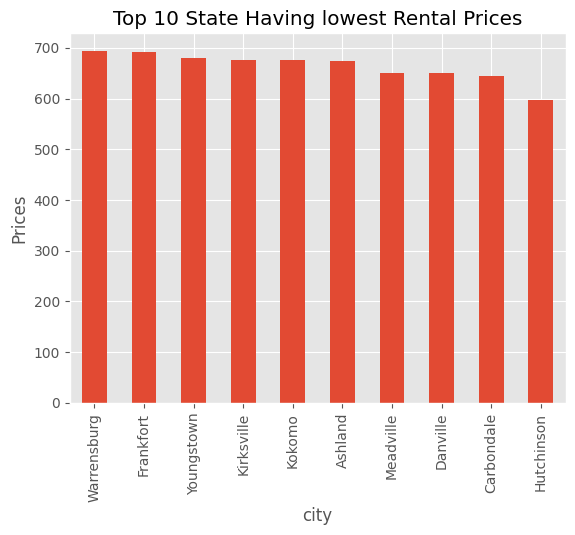

In [37]:
merged_df.groupby(['city'])['RentalPrice'].mean().sort_values(ascending = False).tail(10).plot(kind = 'bar')
plt.title('Top 10 State Having lowest Rental Prices')
plt.ylabel('Prices')
plt.show()

## Summary of Findings:


* San Jose, CA is the region having highest price: 1473831.987
* Glenwood Springs, CO is the region having highest price: 28465.27778
* There is a medium positive correlation between home price and rental price
* Home Prices and Rental prices are following exactly same pattern over the years
* Except the differnce in prices.
* So the above graphs also justifies the correlation as well.
* The prices increased over the years of both house and rental.
* There is a major price bump after 2020
* HI is the state having highest house price
* CO is the state having highest Rental price
* WI is the state having lowest Rental price
* LA is the state having lowest house price
* San Jose city is having highest house price
* Glenwood city is having Springs highest Rental price
* Carbondale city is having lowest house price
* Warrensburg city is having lowest rental price

## Output Files:

1. merged_data.csv: Contains the cleaned and merged data from the homes_df and rentals_df DataFrames. It includes the columns:
* city
* state
* year
* home_price
* rent

In [38]:
merged_data = merged_df[['city', 'state', 'Year', 'HomePrice', 'RentalPrice']]
merged_data.to_csv('merged_data.csv', index = False)

2. average_prices_by_year.csv: This CSV file contains the average prices for homes and rentals by year. It includes the columns:
* date
* home_price_mean
* rent_mean

In [39]:
#average_prices_by_year
average_prices_by_year = merged_df.groupby('Year').agg(home_price_mean = ('HomePrice', 'mean'), 
                                                       rent_mean = ('RentalPrice', 'mean'))
average_prices_by_year

,home_price_mean,rent_mean
Year,,
2015,194076.489072,1077.672058
2016,202576.588259,1131.551025
2017,209624.752642,1160.745971
2018,221581.118263,1200.146708
2019,231757.451989,1247.869215
2020,246192.834691,1290.616823
2021,281713.803106,1411.154924
2022,309795.881025,1524.466085
2023,295717.586822,1500.258758


In [40]:
average_prices_by_year.to_csv('average_prices_by_year.csv')

3. top_10_cities_home_price.csv: This CSV file contains the top 10 cities with the highest average home price. It includes the columns:
* city
* state
* home_price

In [41]:
top_10_cities_home_price  = merged_df.groupby(['city', 'state'])['HomePrice'].mean().sort_values(ascending = False).head(10).reset_index()

In [42]:
top_10_cities_home_price.to_csv('top_10_cities_home_price.csv', index = False)

4. top_10_cities_rent.csv: This CSV file contains the top 10 cities with the highest average rent. It includes the columns:
* city
* state
* rent

In [43]:
top_10_cities_rent  = merged_df.groupby(['city', 'state'])['RentalPrice'].mean().sort_values(ascending = False).head(10).reset_index()



In [44]:
top_10_cities_rent

,city,state,RentalPrice
0,Glenwood Springs,CO,16499.943200
1,Breckenridge,CO,4000.000000
2,Kahului,HI,3093.830186
3,Key West,FL,3011.269923
4,San Jose,CA,2866.870374
5,San Francisco,CA,2783.934678
6,New York,NY,2617.719111
7,Santa Cruz,CA,2608.037786
8,Hilo,HI,2605.971544
9,Boston,MA,2503.632994


In [45]:
top_10_cities_rent.to_csv('top_10_cities_rent.csv', index = False)